<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01685424/blob/main/Sem_06_CD_Transformaci%C3%B3n_y_reducci%C3%B3n_de_dimensiones_A01685424.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Actividad Semanal -- 5
## Repaso Transformación y reducción de dimensiones

### Materia: Ciencia y analítica de datos
**Profesora: María de la Paz Rico Fdz.

**Alumno: Fernando Alfredo Rojas Estrella**

**Matricula: A01685424**


---


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [57]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 1.a EJEMPLO DE EIGENVALORES

import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv

# Se define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("\n-----------------------------\n")

# Se calcula la eigendescomposición
values, vectors = eig(A)
print('D:') #D
print(values) #D
print('W:') #W
print(vectors) #W

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 1.b Ejemplo de reconstrucción de matriz

print("\n---------------------------------")
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print('\nValues:')
print(values)
print('\nValues np.diag D:')
print(D)
print('\nVectors W:')
print(W)
print('\nW inversa:')
print(Winv)

print("\n-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.matmul(W,D) # Multiplicación utilizando la función matmul de numpy
B = np.matmul(B,Winv)
print('\nMatriz B reconstruida calculada con np.matmul:')
print(B)
print("\n-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]

-----------------------------

D:
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
W:
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

---------------------------------

Values:
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]

Values np.diag D:
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.30367773e-15]]

Vectors W:
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

W inversa:
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]

-------Matriz reconstruida-------

Matriz B reconstruida calculada con np.matmul:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

-----------------------------


In [74]:
# Sección de notas y ejercicios personales
# Definición de función que multiplica 2 matrices

def Multiplica_matrices(A,B):
  print('\n -------------- Función: Multiplicación de matrices --------------')
  print('Shape columnas A:',A.shape[1], 'Shape columnas B:',B.shape[0])
  #C global
  if A.shape[1] == B.shape[0]:
    print('La multiplicación de matrices es posible')
    C = np.zeros( (A.shape[0], B.shape[1]), dtype = int)
    for row in range(A.shape[0]): 
        for col in range(B.shape[1]):
            for elt in range(len(B)):
              C[row, col] += A[row, elt] * B[elt, col]
    print('Matriz resultante:')
    print(C)
    print(' ---------------------- Fin de la función ----------------------\n')
    return C
  else:
    print(' ---------------------- Fin de la función ----------------------\n')
    return "No se puede realizar la multiplicación de matrices"

In [38]:
# Sección de notas y ejercicios personales
# Probando funciones de algebra de matrices

# Se intercambian filas por columnas en la Trasposición de matriz
Atranspose = A.transpose() # Tambien se puede utilizar .T
print('A transpuesta:')
print(Atranspose) 

# Multiplación de matrices: F = BE y Producto escalar Fij=Bi*Ej (suma del producto fila B x columna J)
B = array([[1, 2, 3], [4, 5, 6]])
E = array([[1, 4], [2, 5], [3, 6]])
print('\nMatriz B')
print(B)
print('\nMatriz E')
print(E)

Multiplica_matrices(B,E) # Multiplicación utilizando la función creada
F = np.matmul(B,E) # Multiplicación utilizando la función matmul de numpy
print('\nMatriz F calculada con np.matmul:')
print(F)

# Matriz inversa, solo se pueden invertir matrices cuadradas

A transpuesta:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

Matriz B
[[1 2 3]
 [4 5 6]]

Matriz E
[[1 4]
 [2 5]
 [3 6]]

 -------------- Función: Multiplicación de matrices --------------
Shape columnas A: 3 Shape columnas B: 3
La multiplicación de matrices es posible
Matriz resultante:
[[14 32]
 [32 77]]
 ---------------------- Fin de la función ----------------------


Matriz F calculada con np.matmul:
[[14 32]
 [32 77]]


In [58]:
# Sección de notas y ejercicios personales
# Probando funciones
n, m = A.shape
Covarianza_matrix = np.dot(A.T, A) / (n-1)
print('\nCovarianza:')
print(Covarianza_matrix)

A_pca = np.dot(A, W)
print('\nA_PCA:')
print(A_pca)


Covarianza:
[[33.  39.  45. ]
 [39.  46.5 54. ]
 [45.  54.  63. ]]

A_PCA:
[[-3.73863537e+00  8.77649763e-01 -9.43689571e-16]
 [-8.46653421e+00  9.68877101e-02 -5.55111512e-16]
 [-1.31944331e+01 -6.83874343e-01 -1.66533454e-16]]


---
Calculando eigenvalores y eigenvectores y reconstruyendo matrices originales
---

In [75]:
#Matriz 1
A_0 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])

In [80]:
# Calculando eigenvalores y eigenvectores y reconstruyendo matriz original
print("-------Matriz A1 original-------")
print(A_0)
print("--------------------------------")

values_0, vectors_0 = np.linalg.eig(A_0) # Se calcula la eigendescomposición

W_0 = vectors_0
Winv_0 = np.linalg.inv(W_0)
D_0 = np.diag(values_0)

print('\nW1:') #W
print(W_0) #W
print('\nMatriz D1:') #D
print(D_0) #D
print('\nW1 inversa:') #W
print(Winv_0) #W

print("\n-------Matriz A1 reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B_0 = np.matmul(W_0,D_0) # Multiplicación utilizando la función matmul de numpy
B_0 = np.matmul(B_0,Winv_0)
#B_0[B_0<0.001] = 0.0
print('\nMatriz B1 reconstruida calculada con np.matmul:')
print(B_0)
print("\n-----------------------------")

-------Matriz A1 original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
--------------------------------

W1:
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]

Matriz D1:
[[3.54451153+0.j         0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.22774424+1.82582815j 0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.22774424-1.82582815j]]

W1 inversa:
[[-0.95827338-1.73001905e-17j -0.1739303 +3.46003810e-17j
  -0.61649796-0.00000000e+00j]
 [-0.30900456-3.92091481e-01j  0.52417711+1.74262881e-01j
  -0.19879576+9.96744696e-01j]
 [-0.30900456+3.92091481e-01j  0.52417711-1.74262881e-01j
  -0.19879576-9.96744696e-01j]]

-------Matriz A1 reconstruida-------

Matriz B1 reconstruida calculada con np.matmul:
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   

In [ ]:
#Matriz 2
A_0 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])

In [72]:
# Calculando eigenvalores y eigenvectores y reconstruyendo matriz original
print("-------Matriz A2 original-------")
print(A_0)
print("--------------------------------")

values_0, vectors_0 = np.linalg.eig(A_0) # Se calcula la eigendescomposición

W_0 = vectors_0
Winv_0 = np.linalg.inv(W_0)
D_0 = np.diag(values_0)

print('\nW2:') #W
print(W_0) #W
print('\nMatriz D2:') #D
print(D_0) #D
print('\nW2 inversa:') #W
print(Winv_0) #W

print("\n-------Matriz A2 reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B_0 = np.matmul(W_0,D_0) # Multiplicación utilizando la función matmul de numpy
B_0 = np.matmul(B_0,Winv_0)
B_0[B_0<0.001] = 0.0
print('\nMatriz B2 reconstruida calculada con np.matmul:')
print(B_0)
print("\n-----------------------------")

-------Matriz A2 original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
--------------------------------

W2:
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]

Matriz D2:
[[ 3.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]

W2 inversa:
[[ 0.72111026  0.72111026  2.88444102]
 [-0.56568542  0.84852814  1.50849447]
 [ 0.          0.          3.14466038]]

-------Matriz A2 reconstruida-------

Matriz B2 reconstruida calculada con np.matmul:
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]

-----------------------------


In [ ]:
#Matriz 3
A_0 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])

In [73]:
# Calculando eigenvalores y eigenvectores y reconstruyendo matriz original
print("-------Matriz A3 original-------")
print(A_0)
print("--------------------------------")

values_0, vectors_0 = np.linalg.eig(A_0) # Se calcula la eigendescomposición

W_0 = vectors_0
Winv_0 = np.linalg.inv(W_0)
D_0 = np.diag(values_0)

print('\nW0:') #W
print(W_0) #W
print('\nMatriz D0:') #D
print(D_0) #D
print('\nW0 inversa:') #W
print(Winv_0) #W

print("\n-------Matriz A0 reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B_0 = np.matmul(W_0,D_0) # Multiplicación utilizando la función matmul de numpy
B_0 = np.matmul(B_0,Winv_0)
B_0[B_0<0.001] = 0.0
print('\nMatriz B0 reconstruida calculada con np.matmul:')
print(B_0)
print("\n-----------------------------")

-------Matriz A3 original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
--------------------------------

W0:
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]

Matriz D0:
[[ 3.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]

W0 inversa:
[[ 0.72111026  0.72111026  2.88444102]
 [-0.56568542  0.84852814  1.50849447]
 [ 0.          0.          3.14466038]]

-------Matriz A0 reconstruida-------

Matriz B0 reconstruida calculada con np.matmul:
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]

-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


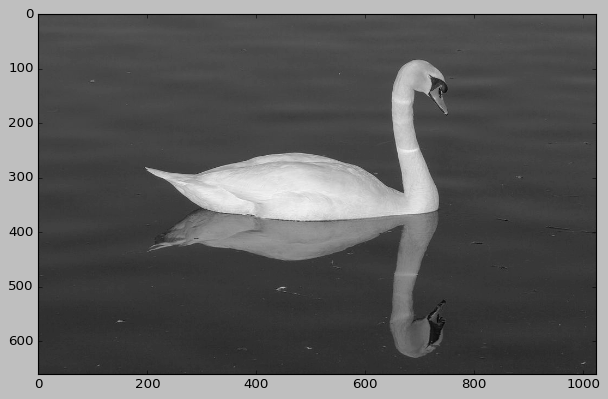

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FD76C1117D0>


In [81]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [85]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [83]:
U.shape

(660, 660)

In [92]:
D.shape # Sigma array

(660,)

In [99]:
# creando una matriz diagonal rectangular de valores singulares
D_diag= np.diag(D) # Sigma como vector
D_diag.shape

(660, 660)

In [84]:
V.shape

(1024, 1024)

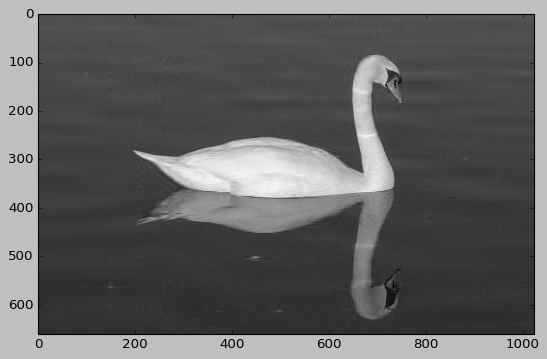

Felicidades la imagen está comprimida


In [102]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [105]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def comprimir_imagen(URL_,nvalue_):

  plt.style.use('classic')
  img = Image.open(urllib.request.urlopen(URL_)).convert('LA')
  #img = Image.open('lucy.jpg')
  imggray = img.convert('LA')
  imgmat = np.array(list(imggray.getdata(band=0)),float)

  print(imgmat)

  imgmat.shape = (imggray.size[1],imggray.size[0])

  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.show()
  print(img)

  U,D,V = np.linalg.svd(imgmat)
  imgmat.shape

  U.shape

  D.shape # Sigma array

  # creando una matriz diagonal rectangular de valores singulares
  D_diag= np.diag(D) # Sigma como vector
  D_diag.shape

  V.shape

  nvalue = nvalue_
  #------------------------------
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  #ve las dimensiones de la imagen y su descomposicion
  #660x1024= U(660X660)D(660X1024)V(1024x1024)
          #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

          #=U(660X50)(50X50)(50X1024)
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
  print("Felicidades la imagen está comprimida")

[255. 255. 255. ... 238. 238. 239.]


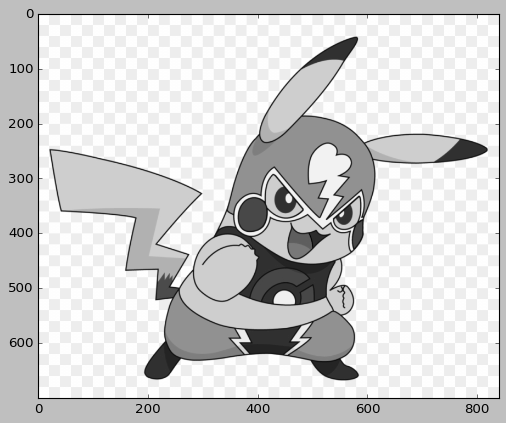

<PIL.Image.Image image mode=LA size=840x700 at 0x7FD766425FD0>


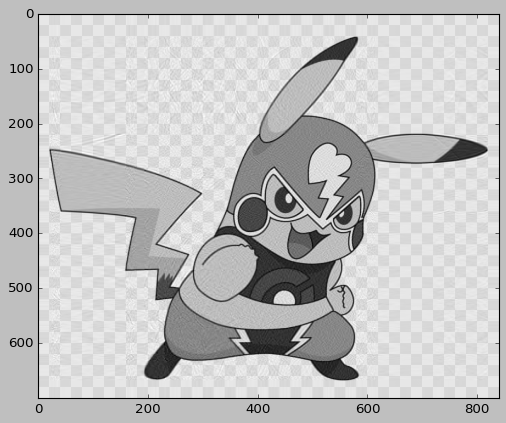

Felicidades la imagen está comprimida


In [126]:
#imagen 1

comprimir_imagen('https://www.pngfind.com/pngs/m/253-2537226_1024-x-781-4-0-pikachu-libre-hd.png',120)

[5. 5. 5. ... 2. 1. 1.]


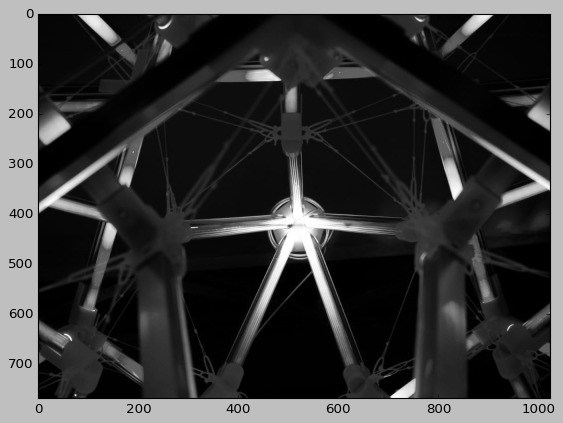

<PIL.Image.Image image mode=LA size=1024x768 at 0x7FD766888890>


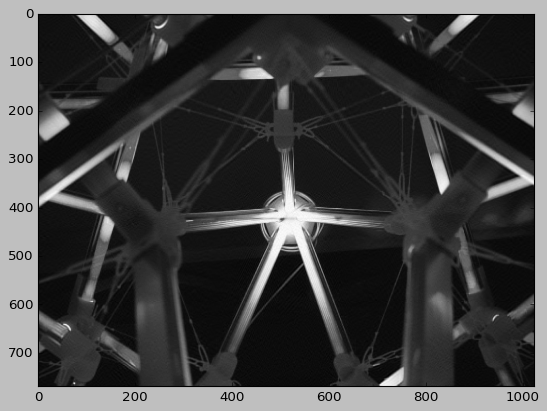

Felicidades la imagen está comprimida


In [121]:
#imagen 2
comprimir_imagen('https://www.derechosdigitales.org/wp-content/uploads/jj-ying-787486-unsplash-1024x768.jpg',150)

[39. 39. 39. ... 69. 58. 52.]


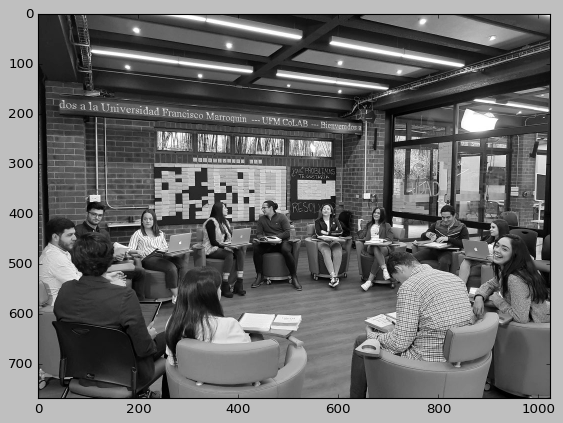

<PIL.Image.Image image mode=LA size=1024x768 at 0x7FD7667C4B90>


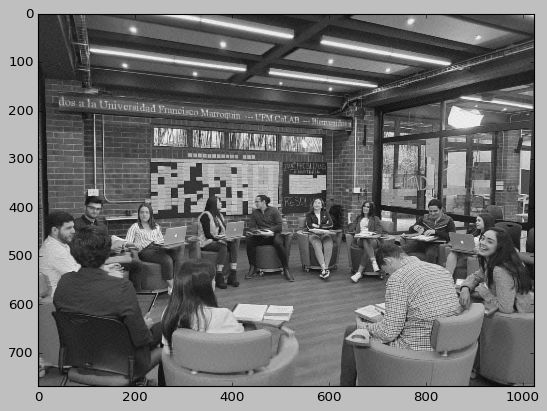

Felicidades la imagen está comprimida


In [118]:
#imagen 3
comprimir_imagen('https://derecho.ufm.edu/wp-content/uploads/2022/08/UFM-Derecho-carrousel-2-1024x768.jpg',200)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




### **Resumen:**

---

1. **Introducción y Antecedentes: PCA lineal:** transformación ortogonal de datos de una serie de datos no correlacionados viviendo en un espacio PCA reducido.

- El análisis de componentes principales (PCA) es una conocida técnica de reducción de dimensionalidad no supervisada que construye características/variables relevantes a través de combinaciones lineales o no lineales.

- Las características relevantes se obtienen a través de la transformación lineal de variables correlacionadas.

- - Proyectando el producto escalar de los datos originales en el espacio PCA reducido a través de los vectores propios de la matriz de covarianza/correlación --> conocidos como componentes principales (PC).

- El primer componente principal explica la mayor variación en los datos y cada componente posterior explica el resto.

---

2. **Cuándo y por qué usar PCA**

- Útil en procesamiento de datos con multicolinealidad entre las características/variables.

- Se utiliza cuando las dimensiones de las características de entrada son altas.

- Se utiliza para eliminar ruido y realizar compresión de datos.

---

3. **Núcleo del método de PCA**

- Partiendo de una matriz X con los datos originales en el formato [n_samples, n_features], seguir los siguientes pasos

- a. Las variables de entrada en X tienen una puntuación z, es decir, asegurar que cada variable original (cada columna de la matriz X) tiene media cero y desviación estandar unitaria. 
- b. construcción y descomposición propia de la matriz de covarianza Cx = (1/n)X'X.
- c. Clasificar los valores propios en orden decreciente (varianza decreciente).
- d. Proyectar (transformar) los datos normalizados originalmente en el espacio reducido PCA a través de multiplicar (producto escalar) los datos normalizados originalmente por los vectores propios principales de la matriz de covarianza.
- e. Visualizar los datos proyectados, la contribución de las variables originales en un gráfico de conjunto utilizando "biplot".

---

4. **Número máximo de componentes significativos**

- El rango de la matriz de covarianza/correlación se relacionan con el límite superior de los componentes significativos a extraer con PCA.

- - Rango máximo = CxX[n_samples, n_features/n_variables][n_features, n_features]min(n_samples, n_features)

- - Máximo componentes/dimensiones de PC = min(n_samples, n_features) significativos.

---


In [127]:
#tu codigo 
# 5. Ejemplo de python utilizando scikit-learn con el conjunto de datos Iris

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

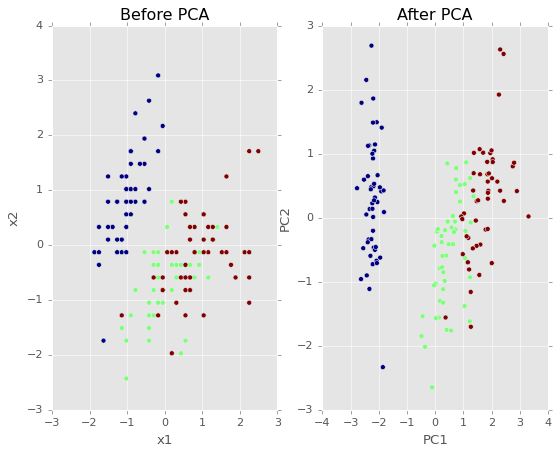

In [128]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [129]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [130]:
# 6. Prueba de que los valores propios de la matriz de covarianza original son
#    iguales a las varianzas del espacio reducido
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [131]:
pca.explained_variance_
array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

In [133]:
# 7. Importancia de característica
print(abs( pca.components_ ))
#[[0.52106591 0.26934744 0.5804131 0.56485654]
# [0.37741762 0.92329566 0.02449161 0.06694199]]

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [134]:
#Primer componente principal
#[[0.52106591 0.26934744 0.5804131 0.56485654]

In [135]:
# 8. Utilizando biplot para comprobar

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

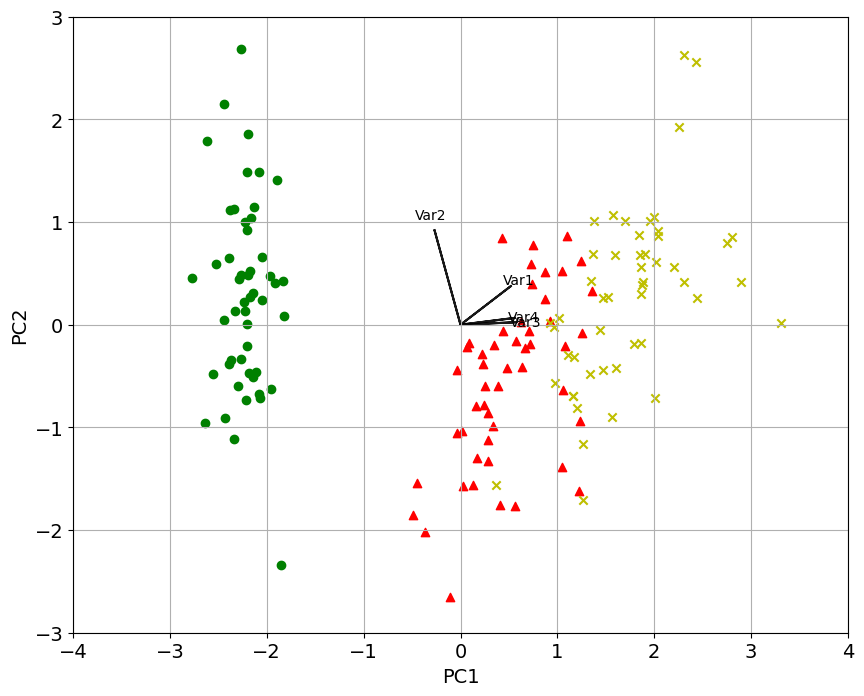

In [136]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [139]:
# Verificando

# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
#0.9628654314027957

0.9628654314027957

In [138]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
#-0.42844010433054014

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

En resumen lo más destacable son los pasos del proceso de PCA que se debe de seguir:

1. Cargar los datos.
2. Normalizarlos.
3. Obtener los eigenvectores y eigenvalores a partir de la matriz de covarianza.
4. Seleccionar los eigenvectores correspondientes a las componentes principales (PC).
5. Proyectar el dataset original sobre el nuevo espacio de dimensión.

---
---

# Preguntas y respuestas

+ Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.
  + Es interesante notar que existen varias formas de llegar al mismo resultado utilizando las librerías/herramientas de python o incluso realizando funciones propias. En este proceso de utilización de herramientas hay reglas a tomar en consideración como pudiera ser el de multiplicación de matrices en el que es necesario que las dimensiones entre las matrices coincidad para poder realizar la multiplicación que se pueden pasar por alto al momento de utilizar las herramientas de python, pero que son importantes para poder tener un mejor entendimiento de lo que está sucediendo.
  + También es importante entender que información como outliers en los datos, podría afectar al proceso de feature importance.

+ ¿Qué es feature importance y para que nos sirve?
  + El feature importance se refiere a las técnicas que permiten entender de todas las caracteríticas de un conjunto de datos, cuales representan la mayor cantidad de información del fenómeno a modelar. en otras palabras, el feature importance clasifica las características según el efecto que tengan en la predicción del modelo.

+ ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
  + Algunos de los hallazgos fueron el que se puede observa claramente como en el espacio PCA, la varianza se maximiza a lo largo de PC1.
  + También pude observa que se puede realizar la comprobación de la máxima varianza a través de la estimación de la matriz de la covarianza son iguales a los valores propios reales de la covarianza.
  + Algo relevante que vi fue que la importancia de las características se ve reflejada en la magnitud de los valores correspondientes en los vectores propios de los componentes principales, indicandonos que característica/variables son las más importantes para cada componente principal.

+ ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
  + Esté conocimiento es útil principalmente cuando se trata de procesar datos con multicolinealidad entre las características de los datos, cuando las dimensiones de entrada son altas o cuando se desea realizar compresión o eliminar el ruido del conjunto de datos.


---
---
